In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
ult_df = pd.read_json('ultimate_data_challenge.json')

In [3]:
ult_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
ult_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
'''avg_rating_of driver, avg_rating_by_driver, and phone have missing values based on count in the above describe line. These
will need to be imputed with reasonable data'''

'avg_rating_of driver, avg_rating_by_driver, and phone have missing values based on count in the above describe line. These\nwill need to be imputed with reasonable data'

In [6]:
median_imputer = SimpleImputer(strategy='median')
ult_df['avg_rating_of_driver'] = median_imputer.fit_transform(ult_df['avg_rating_of_driver'].values.reshape(-1,1))

In [7]:
mean_imputer = SimpleImputer(strategy='mean')
ult_df['avg_rating_by_driver'] = median_imputer.fit_transform(ult_df['avg_rating_by_driver'].values.reshape(-1,1))

In [8]:
ult_df['phone'] = ult_df['phone'].fillna('Not Listed')

In [9]:
np.dtype(ult_df['last_trip_date'])

dtype('O')

In [10]:
ult_df['last_trip_date'] = pd.to_datetime(ult_df['last_trip_date'])

In [11]:
x = len(ult_df)
active = []
prev_30 = max(ult_df['last_trip_date']) - relativedelta(days=30)
for i in range(x):
    if ult_df['last_trip_date'][i] > prev_30:
        active.append(1)
    else:
        active.append(0)
    

In [12]:
ult_df['active_user'] = active

In [13]:
bl_user = []
for i in range (x):
    if ult_df['ultimate_black_user'][i] == True:
        bl_user.append(1)
    if ult_df['ultimate_black_user'][i] == False:
        bl_user.append(0)

In [14]:
ult_df['ultimate_black_user'] = bl_user

In [15]:
ult_df = pd.get_dummies(ult_df, columns = ['phone', 'city'])

In [16]:
ult_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,phone_Android,phone_Not Listed,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,1,0,0,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(ult_df.drop(columns=['signup_date', 'last_trip_date', 'active_user']), 
                                                    ult_df.active_user, test_size=0.25, random_state=1701)

In [18]:
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1701)

In [19]:
y_pred_test = rf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      7912
           1       0.69      0.64      0.66      4588

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [21]:
importances = rf.feature_importances_

In [22]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [23]:
rf_importances

avg_dist                  0.294388
weekday_pct               0.132285
avg_rating_by_driver      0.111374
avg_rating_of_driver      0.080501
trips_in_first_30_days    0.079240
surge_pct                 0.078661
avg_surge                 0.072616
city_King's Landing       0.049223
ultimate_black_user       0.033148
phone_iPhone              0.020367
phone_Android             0.020143
city_Astapor              0.015344
city_Winterfell           0.011519
phone_Not Listed          0.001190
dtype: float64

In [27]:
features = ['avg_dist', 'weekday_pct', 'avg_rating_by_driver', 'avg_rating_of_driver', 
            'trips_in_first_30_days', 'surge_pct', 'avg_surge']

In [28]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'active_user', data= ult_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='active/inactive')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

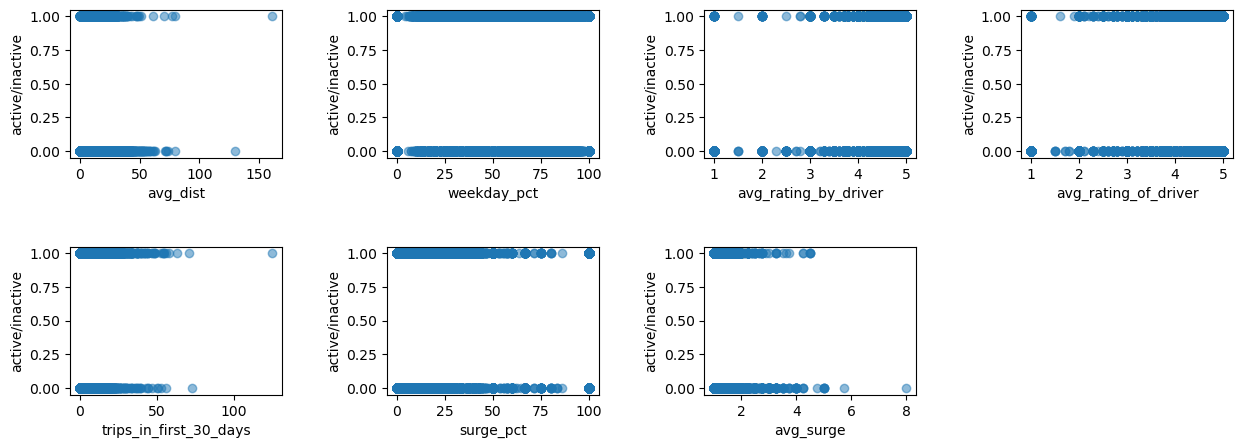

In [30]:
scatterplots(features, ncol=4, figsize=(15, 5))

In [31]:
'That is not all that helpful, I will get numbers'

'That is not all that helpful, I will get numbers'

In [32]:
active_df= ult_df[ult_df['active_user'] ==1]
active_df.head(2)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,phone_Android,phone_Not Listed,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,0,1,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,0,1,0,1,0


In [34]:
inactive_df = ult_df[ult_df['active_user'] == 0]
inactive_df.head(2)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,phone_Android,phone_Not Listed,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
1,0,2014-01-29,5.0,1.0,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.0,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,1,1,0,0


In [35]:
active_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,phone_Android,phone_Not Listed,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
count,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000,18310.0,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000,18310.000000
mean,3.349590,4.619623,1.073720,9.128165,0.511141,62.214604,5.118977,4.763561,1.0,0.160677,0.007100,0.832223,0.219661,0.344457,0.435882
std,5.020615,0.521711,0.163183,15.489344,0.499890,29.068319,4.627946,0.324425,0.0,0.367243,0.083964,0.373678,0.414029,0.475204,0.495885
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000,1.000000,0.000000,0.000000,45.500000,2.560000,4.700000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,4.800000,1.000000,0.000000,1.000000,65.200000,3.730000,4.800000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,1.090000,13.300000,1.000000,85.700000,5.880000,5.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,125.000000,5.000000,4.500000,100.000000,1.000000,100.000000,160.960000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
inactive_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,phone_Android,phone_Not Listed,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
count,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.0,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000,31690.000000
mean,1.659167,4.667611,1.075367,8.688548,0.299621,60.181597,6.188478,4.787999,0.0,0.381193,0.008394,0.610413,0.394825,0.120637,0.484538
std,2.661903,0.603863,0.250219,22.132211,0.458099,40.985698,6.213027,0.502776,0.0,0.485687,0.091234,0.487664,0.488821,0.325711,0.499769
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,0.000000,16.700000,2.320000,4.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,0.000000,66.700000,4.030000,5.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,5.000000,1.000000,0.000000,1.000000,100.000000,7.770000,5.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,73.000000,5.000000,8.000000,100.000000,1.000000,100.000000,129.890000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
'''The most predictive feature of an active user was the average distance. This was approximately 1 mile less from active users
than inactive users. We do not have information on total trips during this time period, this may be a surrogate for this feature. 
Someone who is willing to user Uber on short trips, I would imagine would have more frequent trips. Relatedly percent of weekday 
trips by a user also predicted active user. In this case the mean only differed by approximately 2%. However, active users were
much more consistent, i.e. have a lower standard deviation. 

Trips in the first 30 days was also weekly predictive. And there was a notable difference between the active users and inactive 
users. There were approximately double the number of trips in the first 30 days among active users vs inactive users. 
This is only weakly predictive, however, but perhaps some encouragement to use Ultimate during the first 30 days is warranted

Other features were also weakly predictive, but there was not a large differences bewteen active and inactive usersand are 
not obviously actionable. '''

'The most predictive feature of an active user was the average distance. This was approximately 1 mile less from active users\nthan inactive users. We do not have information on total trips during this time period, this may be a surrogate for this feature. \nSomeone who is willing to user Uber on short trips, I would imagine would have more frequent trips. Relatedly percent of weekday \ntrips by a user also predicted active user. In this case the mean only differed by approximately 2%. However, active users were\nmuch more consistent, i.e. have a lower standard deviation. \n\nTrips in the first 30 days was also weekly predictive. And there was a notable difference between the active users and inactive \nusers. There were approximately double the number of trips in the first 30 days among active users vs inactive users. \nThis is only weakly predictive, however, but perhaps some encouragement to use Ultimate during the first 30 days is warranted\n\nOther features were also weakly predic